In [2]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


Accuracy: 95.73%


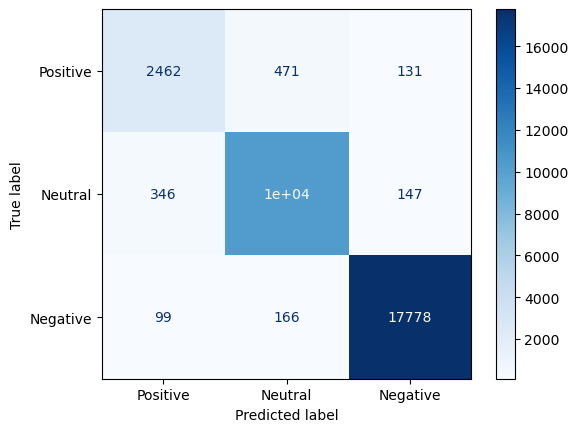

In [3]:
from transformers import pipeline
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

#--------------------------------------------------------------------------------------
# results = []

# # Load your CSV
# df = pd.read_csv("filtered_dataset.csv")  # replace with your filename

# # Create the sentiment analysis pipeline
# pipe = pipeline(
#     "sentiment-analysis",
#     model="StephanAkkerman/FinTwitBERT-sentiment",
#     device=0 
# )

# # Pass each tweet into the pipeline
# tweets = df['tweet'].dropna().tolist() 

# for tweet in tweets:
#     result = pipe(tweet)
#     label = result[0]['label']
#     score = result[0]['score']
#     results.append((tweet, label, score))

# # Create a DataFrame
# results_df = pd.DataFrame(results, columns=["tweet", "predicted_label", "confidence_score"])

# # Save it
# results_df.to_csv("predicted_tweet_sentiments.csv", index=False)
#------------------------------------------------------------------------------------------

actual_df = pd.read_csv("filtered_dataset.csv")
predicted_df = pd.read_csv("predicted_tweet_sentiments.csv")

merged_df = pd.merge(actual_df, predicted_df, on="tweet")

del actual_df, predicted_df

# Map predicted text labels (BEARISH, BULLISH, NEUTRAL) to numbers
def map_predicted(label):
    if label.upper() == "BULLISH":
        return 1
    elif label.upper() == "NEUTRAL":
        return 0
    elif label.upper() == "BEARISH":
        return 2
    else:
        return -1

merged_df['predicted_mapped'] = merged_df['predicted_label'].apply(map_predicted)

# Add a "Correct" column
merged_df['correct'] = merged_df['sentiment'] == merged_df['predicted_mapped']

merged_df.to_csv("comparison_results.csv", index=False)

# Calculate Accuracy
accuracy = accuracy_score(merged_df['sentiment'], merged_df['predicted_mapped'])
print(f"Accuracy: {accuracy*100:.2f}%")

cm = confusion_matrix(merged_df['sentiment'], merged_df['predicted_mapped'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Neutral", "Negative"])
disp.plot(cmap="Blues")


